In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


In [4]:
#df = pd.read_parquet('deidentified.parquet')

df_invalids = pd.read_csv('csv/invalid_dstIP.csv')

In [7]:

# Removendo as linhas duplicadas
df_unique = df_invalids.drop_duplicates()

# Mostrando o DataFrame resultante
#print(df_unique)
print(df_unique.shape[0])


804


In [4]:
df = df[df['Classification'] == "MiscAttack"]
df['date(mmddyyyy)'] = pd.to_datetime(df['date(mmddyyyy)'], format='%m%d%Y')
df['Month'] = df['date(mmddyyyy)'].apply(lambda x: str(x.year) + "-" + str(x.month))

In [6]:
grouped = df.groupby('Month')
grouped

In [7]:
df.head()

,date(mmddyyyy),srcIP,srcPort,dstIP,dstPort,protocol,priority,IDSID,SignatureGroup,Classification,Month
29,2022-10-06,21,48464,22,6996,TCP,2,1,ET_CINS_Active_Threat_Intelligence_Poor_Reputa...,MiscAttack,2022-10
37,2022-10-06,27,56085,28,5432,TCP,2,1,ET_CINS_Active_Threat_Intelligence_Poor_Reputa...,MiscAttack,2022-10
38,2022-10-06,29,33588,4,247,TCP,2,1,ET_CINS_Active_Threat_Intelligence_Poor_Reputa...,MiscAttack,2022-10
39,2022-10-06,30,35845,22,8443,TCP,2,1,ET_CINS_Active_Threat_Intelligence_Poor_Reputa...,MiscAttack,2022-10
46,2022-10-06,34,18798,4,2375,TCP,2,1,ET_CINS_Active_Threat_Intelligence_Poor_Reputa...,MiscAttack,2022-10


In [5]:
# Load data
df = pd.read_csv('locations_info.csv')

df_brazil = df[df['Country'] == "Brazil"]
df_brazil.head()

,Month,Fake_ip,Country,State,City,Occurrences,Latitude,Longitude
95,2012-1,21894,Brazil,São Paulo,São Paulo,2,-23.5335,-46.6359
221,2012-1,31230,Brazil,Rio Grande do Sul,Vera Cruz,2,-29.7728,-52.5282
229,2012-1,49965,Brazil,Federal District,Brasília,2,-15.7792,-47.9341
268,2012-1,35587,Brazil,São Paulo,São Paulo,1,-23.5335,-46.6359
281,2012-1,51260,Brazil,São Paulo,São Paulo,1,-23.5335,-46.6359


In [11]:
# Group by month and country
df_state_brazil = df_brazil.groupby(['Month', 'State']).agg({'Occurrences': 'sum', 'Latitude': 'first', 'Longitude': 'first'}).reset_index()
df_state_brazil.head()

,Month,State,Occurrences,Latitude,Longitude
0,2012-1,Ceará,1,-3.7138,-38.5285
1,2012-1,Federal District,3,-15.7792,-47.9341
2,2012-1,Mato Grosso do Sul,1,-20.4428,-54.6464
3,2012-1,Rio Grande do Sul,2,-29.7728,-52.5282
4,2012-1,São Paulo,8,-23.5335,-46.6359


In [16]:
import geobr 

geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

In [21]:
states = geobr.read_state(year=2019)
states.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.37916..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ..."
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.71230 ..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42843 ..."


(-76.24758052684999, -26.59070825415, -35.70232894755001, 7.222992030549992)

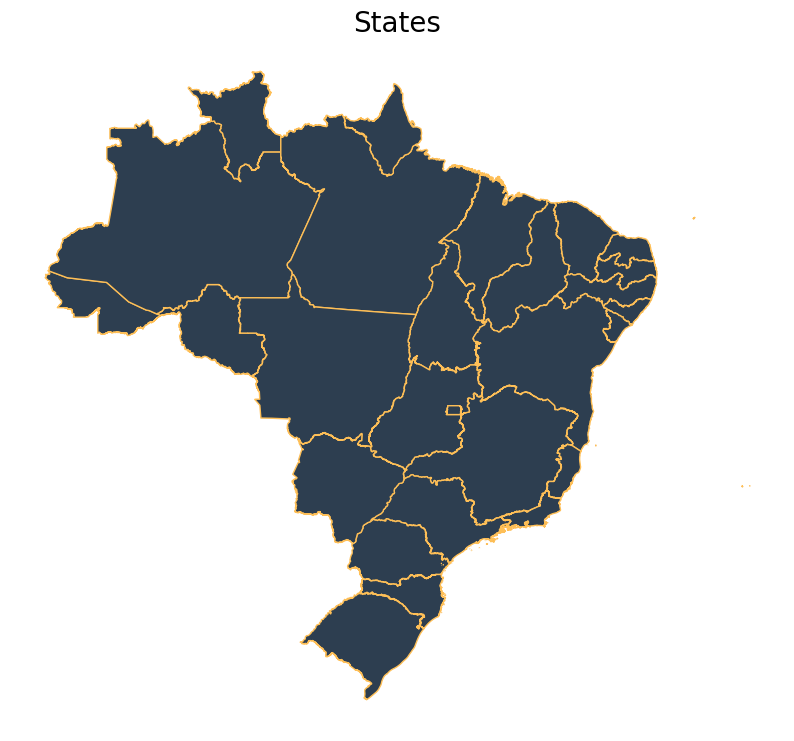

In [20]:
# Plot all Brazilian states
fig, ax = plt.subplots(figsize=(10, 10))

states.plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)

ax.set_title("States", fontsize=20)
ax.axis("off")

In [10]:
num_linhas_total = df_brazil.shape[0]
num_linhas_nulas = df_brazil['State'].isnull().sum()

print("Número de linhas nulas na coluna 'state':", num_linhas_nulas)
print("Número de linhas totais:", num_linhas_total)
print("Porgentagem:", (num_linhas_nulas / num_linhas_total) * 100)

Número de linhas nulas na coluna 'state': 158
Número de linhas totais: 4058
Porgentagem: 3.893543617545589


In [6]:
# Agrupar por país e calcular a media para cada pais (total de ocorrencias para o pais/qntd de vezes que o pais apareceu)
df_country_mean = df.groupby('Country').agg({'Occurrences': 'mean'}).reset_index()

# Mostrar o resultado
df_country_mean.head()
# Encontrar o valor máximo das ocorrências
max_occurrences = df_country_mean['Occurrences'].max()

# Encontrar o valor mínimo das ocorrências
min_occurrences = df_country_mean['Occurrences'].min()

print("Valor máximo de ocorrências:", max_occurrences)
print("Valor mínimo de ocorrências:", min_occurrences)


Valor máximo de ocorrências: 503.5
Valor mínimo de ocorrências: 1.0


In [13]:

# Calculando a porcentagem de valores nulos na coluna 'Estado' em relação ao total de entradas
porcentagem_nulos_estado = (df['Estado'].isnull().sum() / len(df)) * 100
print("Porcentagem de estados nulos em relação ao total de entradas: {:.2f}%".format(porcentagem_nulos_estado))

# Calculando a porcentagem de valores nulos na coluna 'Cidade' em relação ao total de entradas
porcentagem_nulos_cidade = (df['Cidade'].isnull().sum() / len(df)) * 100
print("Porcentagem de cidades nulas em relação ao total de entradas: {:.2f}%".format(porcentagem_nulos_cidade))


Porcentagem de estados nulos em relação ao total de entradas: 34.61%
Porcentagem de cidades nulas em relação ao total de entradas: 32.77%


In [12]:
# Valores únicos de estado
valores_unicos_estado = df['Estado'].unique()

# Quantidade de valores nulos nos valores únicos de estado
valores_nulos_estado = pd.Series(valores_unicos_estado).isnull().sum()
print("Quantidade de estados nulos: ", valores_nulos_estado)

# Valores únicos de cidade
valores_unicos_cidade = df['Cidade'].unique()

# Quantidade de valores nulos nos valores únicos de cidade
valores_nulos_cidade = pd.Series(valores_unicos_cidade).isnull().sum()
print("Quantidade de cidades nulas: ", valores_nulos_cidade)



print(f'Porcentagem estados nulos: {valores_nulos_estado} ({(valores_nulos_estado / df.shape[0]) * 100:.2f}%)')
print(f'Porcentagem cidades nulas: {valores_nulos_cidade} ({(valores_nulos_cidade / df.shape[0]) * 100:.2f}%)')

Quantidade de estados nulos:  1
Quantidade de cidades nulas:  1
Porcentagem estados nulos: 1 (0.00%)
Porcentagem cidades nulas: 1 (0.00%)


In [ ]:
# paleta de cores vermelho: [(255, 204, 204), (255, 153, 153), (255, 102, 102), (255, 51, 51), (255, 0, 0), (204, 0, 0), (153, 0, 0), (204, 0, 0), (51, 0, 0)]

/tmp/ipykernel_7168/3250793684.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_7168/3250793684.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Country'] = df_month['Country'].map(country_mapping).fillna(df_month['Country'])
/home/barbara/.local/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 9 classes. Setting k to 8.
  self.bins = quantile(y, k=k)


[     0.  87527. 175054. 262581. 350108. 437635. 525162. 612689. 700216.
 787743.]


Text(0.5, 1.0, 'Number of srcIP - MiscAttack in 2023-2')

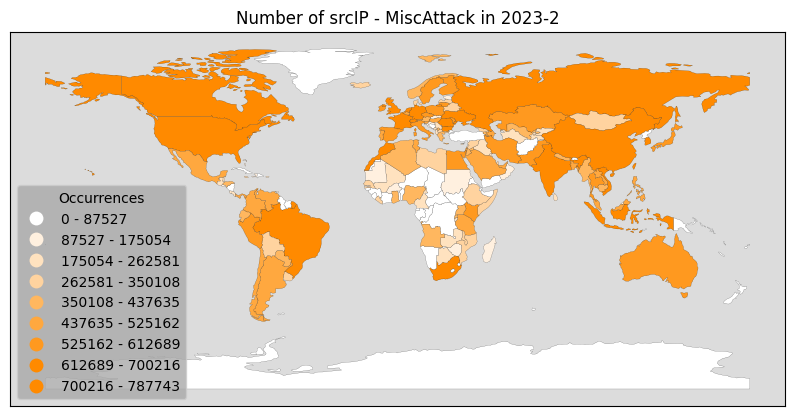

In [11]:
# Load world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Country name mapping
country_mapping = {
    'United States': 'United States of America',
    'The Netherlands': 'Netherlands'
}

df_month = df_country[df_country['Month'] == '2023-2']
# Update country names
df_month['Country'] = df_month['Country'].map(country_mapping).fillna(df_month['Country'])

fig, ax = plt.subplots(figsize=(10, 10))

# Merge the world and df_month DataFrames based on the country name
merged_df = pd.merge(world, df_month, left_on='name', right_on='Country', how='left')

# Fill NaN values in the 'occurrences' column with corresponding values from the merged_df DataFrame
world['occurrences'] = merged_df['Occurrences'].fillna(0)
# Remove unnecessary columns from the world DataFrame
world.drop(columns=['Country', 'Month', 'Latitude', 'Longitude'], inplace=True, errors='ignore')

if( world['occurrences'].max() < 100):
    # Group the occurrences into bins for legend
    bins = np.linspace(world['occurrences'].min(), world['occurrences'].max(), 3)  # Define 5 bins
    world['occurrences_group'] = np.digitize(world['occurrences'], bins, right=True)
    k = 2
elif( world['occurrences'].max() < 200):
    # Group the occurrences into bins for legend
    bins = np.linspace(world['occurrences'].min(), world['occurrences'].max(), 4)  # Define 5 bins
    world['occurrences_group'] = np.digitize(world['occurrences'], bins, right=True)
    k = 3
elif( world['occurrences'].max() < 300):
    # Group the occurrences into bins for legend
    bins = np.linspace(world['occurrences'].min(), world['occurrences'].max(), 5)  # Define 5 bins
    world['occurrences_group'] = np.digitize(world['occurrences'], bins, right=True)
    k = 4
else:
    # Group the occurrences into bins for legend
    bins = np.linspace(world['occurrences'].min(), world['occurrences'].max(), 10)  # Define 5 bins
    world['occurrences_group'] = np.digitize(world['occurrences'], bins, right=True)
    k = 9

#Plot the map
# Configurar a legenda manualmente com os limites dos bins
legend_labels = []
for i in range(len(bins)-1):
    legend_labels.append(f"{bins[i]:.0f} - {bins[i+1]:.0f}")

#print(legend_labels) #saida: ['0 - 7736', '7736 - 15473', '15473 - 23209', '23209 - 30946', '30946 - 38682']

# Defina os pontos de quebra para cada cor da legenda
breakpoints = bins[:-1]
print(bins)

# Defina as cores correspondentes a cada intervalo
colors_hex = ['#FFFFFF', '#FFEBD4', '#FFD8AA', '#FFC57F', '#FFB255', '#FF9E2A', '#FF8A00']

# Crie um LinearSegmentedColormap com base nas cores e pontos de quebra
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", list(zip(np.linspace(0, 1, len(colors_hex)), colors_hex)), N=len(breakpoints))

# Plotar o mapa usando o novo mapa de cores
world.plot(ax=ax, column='occurrences', missing_kwds={'color': 'lightgrey'}, legend=True, scheme="quantiles", legend_kwds={"loc": "lower left", "fmt": "{:.0f}", "title": "Occurrences", 'labels':legend_labels, 'facecolor': 'DarkGray'}, cmap=custom_cmap, edgecolor='black', linewidth=0.1, k=k)
ax.set_facecolor('Gainsboro')

# Remover a última entrada da legenda

#leg = ax.get_legend()

#leg.set_bbox_to_anchor((1.17,0.5))
#ax.set_axis_off()

# Turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'Number of srcIP - MiscAttack in 2023-2')

/tmp/ipykernel_7168/646016151.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_7168/646016151.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Country'] = df_month['Country'].map(country_mapping).fillna(df_month['Country'])
/home/barbara/.local/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 8.
  self.bins = quantile(y, k=k)


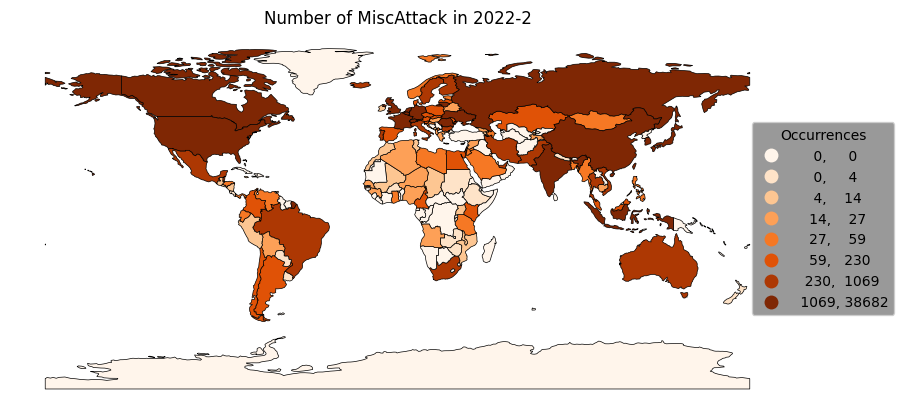

In [3]:

import matplotlib.pyplot as plt
import numpy as np

# Load world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Country name mapping
country_mapping = {
    'United States': 'United States of America',
    'The Netherlands': 'Netherlands'
}

# Create the images for each month
images = []

df_month = df_country[df_country['Month'] == '2022-2']

# Update country names
df_month['Country'] = df_month['Country'].map(country_mapping).fillna(df_month['Country'])

fig, ax = plt.subplots(figsize=(10, 10))

# Merge the world and df_month DataFrames based on the country name
merged_df = pd.merge(world, df_month, left_on='name', right_on='Country', how='left')

# Fill NaN values in the 'occurrences' column with corresponding values from the merged_df DataFrame
world['occurrences'] = merged_df['Occurrences'].fillna(0)  # Replace NaN with 0

# Remove unnecessary columns from the world DataFrame
world.drop(columns=['Country', 'Month', 'Latitude', 'Longitude'], inplace=True, errors='ignore')

# Group the occurrences into bins for legend
# bins = np.linspace(world['occurrences'].min(), world['occurrences'].max(), 6)  # Define 5 bins
# world['occurrences_group'] = np.digitize(world['occurrences'], bins, right=True)

# Plot the map
world.plot(ax=ax, column='occurrences', missing_kwds={'color': 'lightgrey'}, cmap='Oranges', legend=True, legend_kwds={"loc": "center right", "fmt": "{:.0f}", "title": "Occurrences", 'facecolor' : '#808080'}, figsize=(15, 10), scheme="quantiles", edgecolor='black', linewidth=0.5, k=10)
#ax.set_facecolor('#F2FFFF')
leg = ax.get_legend()


leg.set_bbox_to_anchor((1.15,0.5))


ax.set_axis_off()

# Turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'Number of MiscAttack in 2022-2')

plt.show()


In [9]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import os

# Load data
df = pd.read_csv('locations_info.csv')

# Group by month and country
df_country = df.groupby(['Month', 'Country']).agg({'Occurrences': 'sum', 'Latitude': 'first', 'Longitude': 'first'}).reset_index()

# Mapeamento de nomes de Countryes
mapeamento_paises = {
    'United States': 'United States of America',
    'The Netherlands': 'Netherlands'
   
}

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world[['name', 'geometry']]

# Definir os intervalos de valores e as cores correspondentes
value_intervals = [(1, 500), (500, 1000), (1000, 50000), (50000, 100000), (100000, 500000), (500000, float('inf'))]

# colors_rgba = [
#     [1.0, 0.96078431, 0.92156863, 1.0],  # Cor para 1 a 10 mil
#     [0.99551821, 0.88963585, 0.78319328, 1.0],  # Cor para 10 mil a 50 mil
#     [0.99215686, 0.77759104, 0.57366947, 1.0],  # Cor para 50 mil a 100 mil
#     [0.99215686, 0.62689076, 0.34061625, 1.0],  # Cor para 100 mil a 250 mil
#     [0.96526611, 0.47226891, 0.14341737, 1.0],  # Cor para 250 mil a 500 mil
#     [0.87787115, 0.31932773, 0.02408964, 1.0]   # Cor para acima de 500 mil
# ]

colors_hex = ['#b2182b', '#ef8a62', '#fddbc7', '#d1e5f0', '#67a9cf', '#2166ac']

legend_labels = [('1 - 500'), ('500 - 1 mil'), ('1 mil - 50 mil'),('50 mil - 100 mil'),('100 mil - 500 mil'),('Acima de 500 mil')]

def get_color(value):
    for i, (start, end) in enumerate(value_intervals):
        print('start: ', start)
        print('end: ', end)
        print('value: ', value)
        if start <= value < end:
            print('retornou: ', colors_hex[i])
            return colors_hex[i]
    return colors_hex[-1]  # Retorna a última cor para valores maiores que o último intervalo

# Adicione uma coluna 'color' ao DataFrame df_country com a cor correspondente a cada país
df_country['color'] = df_country['Occurrences'].apply(lambda x: get_color(x))
print(df_country.head(5))

# Merge com o DataFrame world
world = pd.merge(world, df_country[['Country', 'color']], left_on='name', right_on='Country', how='left')

# Preencher os valores ausentes com uma cor padrão
world['color'] = world['color'].fillna('gray')
print(world.head(5))

i = 1
images = []

df_mes = df_country[df_country['Month'] == '2023-2']
print('\nMês: 2023-2')

# Atualiza os nomes dos Countryes
df_mes['Country'] = df_mes['Country'].map(mapeamento_paises).fillna(df_mes['Country'])

fig, ax = plt.subplots(1, 1, figsize = (10,10))

# Itera sobre as linhas do DataFrame para o Month atual
for index, row_mes in df_mes.iterrows():
    pais = row_mes['Country']
    count = row_mes['Occurrences']
    country_color = row_mes['color']

    # Plotar mapa do mundo
    world.boundary.plot(ax=ax, color="black", linewidth=0.5)

    # Calcular a cor com base nas Occurrences
    # color_index = int((count / df_mes['Occurrences'].max()) * (len(colors_normalized) - 1))
    # print('color index: ', color_index)
    # country_color = plt.cm.colors.to_rgba(colors_normalized[color_index], alpha=1.0)

    # Verificar se o Country está presente no dataframe do mundo
    if pais in world["name"].values:
        country = world[world["name"] == pais]
        print('country color: ',country_color)
        country.plot(ax=ax, color=country_color, legend=True, scheme="quantiles", legend_kwds={"loc": "lower left", "fmt": "{:.0f}", "title": "Occurrences", 'labels': legend_labels, 'facecolor': 'DarkGray'})
        #print(f'{pais} adicionado')

    # Adicionar legenda
    # add the patches to the map
    #ax.legend(handles=patches, loc="lower left", fontsize='small')
    # Desativar ticks do eixo
    ax.set_xticks([])
    ax.set_yticks([])
    directory = 'teste-dict/'
    # Definir título do gráfico
plt.title(f"Distribuição de srcIP MiscAttack por Country - Month: 2023-2")
# Salvar a figura dentro da pasta com o nome do Month
plt.show()

# Fechar a figura para liberar memória
plt.close()


/tmp/ipykernel_212917/410446346.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_212917/410446346.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['Country'] = df_mes['Country'].map(mapeamento_paises).fillna(df_mes['Country'])


start:  1
end:  500
value:  18
retornou:  #b2182b
start:  1
end:  500
value:  3
retornou:  #b2182b
start:  1
end:  500
value:  10
retornou:  #b2182b
start:  1
end:  500
value:  1
retornou:  #b2182b
start:  1
end:  500
value:  2
retornou:  #b2182b
start:  1
end:  500
value:  2
retornou:  #b2182b
start:  1
end:  500
value:  1
retornou:  #b2182b
start:  1
end:  500
value:  6
retornou:  #b2182b
start:  1
end:  500
value:  1
retornou:  #b2182b
start:  1
end:  500
value:  2
retornou:  #b2182b
start:  1
end:  500
value:  4
retornou:  #b2182b
start:  1
end:  500
value:  2
retornou:  #b2182b
start:  1
end:  500
value:  1
retornou:  #b2182b
start:  1
end:  500
value:  17
retornou:  #b2182b
start:  1
end:  500
value:  4
retornou:  #b2182b
start:  1
end:  500
value:  1
retornou:  #b2182b
start:  1
end:  500
value:  40
retornou:  #b2182b
start:  1
end:  500
value:  2
retornou:  #b2182b
start:  1
end:  500
value:  2
retornou:  #b2182b
start:  1
end:  500
value:  1
retornou:  #b2182b
start:  1
end:  